In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [35]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

#### Precipitation Analysis (last 12 months)

In [11]:
#--Test Measurement--#

test_meas = session.query(Measurement).first()
test_meas

test_meas.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x22e833d55f8>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [12]:
#--Query for Last 12 Months of Precipitation--#

#latest date

latest_date = session.query(Measurement.date,Measurement.prcp).order_by(Measurement.date.desc()).first()
latest_date[0]

#calculate time delta

query_date = dt.date(2017, 8, 23) + relativedelta(months=-12)
query_date = query_date.isoformat()

#12 months

precip_12 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).\
            order_by(Measurement.date).all()
precip_12

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [36]:
#--Create a DataFrame for the above query--#

precip_df = pd.DataFrame(precip_12)
precip_df.head()

#Set index to date

precip_date_df = precip_df.set_index("date")
precip_date_df.head()

#Sort index

precip_date_df = precip_date_df.sort_index(ascending=True)
precip_date_df.dropna(inplace=True)

precip_date_df

prcp
date            
2016-08-23  0.00
2016-08-23  0.15
2016-08-23  0.05
2016-08-23  0.02
2016-08-23  1.79
2016-08-23  0.70
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
...          ...
2017-08-15  0.00
2017-08-15  0.06
2017-08-15  0.32
2017-08-15  0.42
2017-08-16  0.00
2017-08-16  0.07
2017-08-16  0.12
2017-08-16  0.42
2017-08-17  0.00
2017-08-17  0.05
2017-08-17  0.01
2017-08-17  0.13
2017-08-18  0.00
2017-08-18  0.00
2017-08-18  0.06
2017-08-19  0.00
2017-08-19  0.00
2017-08-19  0.09
2017-08-20  0.00
2017-08-20  0.01
2017-08-21  0.00
2017-08-21  0.02
2017-08-21  0.56
2017-08-22  0.00
2017-08-22  0.00
2017-08-22  0.50
2017-08-23  0.00
2017-08-23  0.00
2017-08-23  0.08
2017-08-23  0.45

[2021 rows x 1 columns]

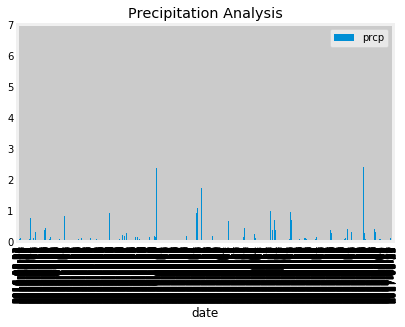

In [14]:
#--Plot Precip_date_df DataFrame--#

precip_date_df.iloc[::1].plot.bar(title="Precipitation Analysis")
plt.show()

In [30]:
#--Summary Statistics for Precipitation Analysis--#

precip_date_df.describe()

prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

#### Station Analysis (last 12 months)

In [32]:
#--Test--#

station_query = session.query(Station).first()
station_query.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x22e873b6630>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'id': 1,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [34]:
#How many stations in data set

session.query()

{'session': <sqlalchemy.orm.session.Session at 0x22e820b0a58>,
 '_polymorphic_adapters': {},
 '_entities': [<sqlalchemy.orm.query._ColumnEntity at 0x22e833d5e48>,
 '_primary_entity': None,
 '_has_mapper_entities': False,
 '_mapper_adapter_map': {<Mapper at 0x22e833b0be0; station>: (<Mapper at 0x22e833b0be0; station>,
   None)},
 '_order_by': [Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False)]}

In [18]:
# Design a query to show how many stations are available in this dataset?


In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [23]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [24]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [25]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [26]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [27]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [28]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [29]:
# Plot the daily normals as an area plot with `stacked=False`
